In [44]:
# Github Repo Link https://github.com/Sifi334/SteamGamesCSVparsedData
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize Plots and Content


Sg = pd.read_csv('/content/drive/MyDrive/CSC_108/paper Proposal/filteredgames2.csv', header=0,index_col=False)
Sg

#Originally from the Games.csv file, these ranges were chosen for cleaning. Mainly cleaning features of images/movies attached to game row.
#cols =  list(range(1, 7)) + list(range(16,19)) + list(range(22,27)) + list(range(29,37))
#Sg = Sg.iloc[:,cols]
#Sg.to_csv('/content/drive/MyDrive/CSC_108/paper Proposal/filteredgames2.csv', index=False)


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Achievements,Recommendations,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,True,False,False,6,...,30,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,True,True,False,53,...,12,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,True,False,False,0,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,True,True,True,3,...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,True,True,False,50,...,17,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111447,Paragon Of Time,"Apr 10, 2025",0 - 20000,0,0,2.99,True,False,False,5,...,0,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro..."
111448,A Few Days With : Hazel,"Apr 11, 2025",0 - 20000,0,0,2.69,True,False,False,0,...,7,0,0,0,0,Hentai Panda,Hentai Panda,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN
111449,MosGhost,"Apr 1, 2025",0 - 20000,0,0,7.99,True,False,False,24,...,0,0,0,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso..."
111450,AccuBow VR,"Mar 11, 2025",0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,0,0,AccuBow LLC,AccuBow LLC,"Single-player,Tracked Controller Support,VR On...","Action,Adventure,Free To Play",NaN


In [46]:
# Handle Random Sampling
randomstate = 52  #
Sg = Sg.sample(frac=.2, random_state=randomstate)
Sg

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Achievements,Recommendations,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
26250,Kromaia,"Oct 23, 2014",20000 - 50000,0,0,19.99,True,False,False,80,...,23,0,0,244,0,Kraken Empire,Kraken Empire,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Shoot 'Em Up,Arcade,Bullet Hell,S..."
22479,"Slayers, Inc. Playtest","Sep 13, 2021",0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
48866,Auto Kitchen,"Jun 12, 2020",0 - 20000,0,0,9.99,True,False,False,11,...,0,0,0,0,0,Architect Studios,Architect Studios,Single-player,"Casual,Indie,Simulation","Casual,Simulation,Indie,Cooking"
57772,The Lewd of the Cock Rings: The Return of Doug...,"Feb 1, 2022",0 - 20000,1,0,0.79,True,False,False,0,...,0,0,0,0,0,Feral Termite,Feral Termite Gaming LLC,Single-player,RPG,NaN
31677,Queen of Zarkov,"Oct 4, 2021",20000 - 50000,0,0,5.99,True,False,False,1,...,0,0,0,0,0,Benedikt Glemnitz,Benedikt Glemnitz,Single-player,"Action,Indie","Looter Shooter,Action Roguelike,Third-Person S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100691,Nanomon: Virtual Pet Playtest,"Oct 8, 2024",0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
102858,Apricity,"Nov 20, 2024",0 - 0,0,0,0.00,True,False,False,0,...,22,0,0,0,0,Luke Veltum,Luke Veltum,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Indie,Strategy,Free To Play",NaN
47665,Loot Hero DX,"Jul 3, 2015",200000 - 500000,0,0,2.99,True,False,False,1047,...,20,243,0,234,0,VaragtP,VaragtP,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,RPG","Side Scroller,2D Platformer,Clicker,Collectath..."
38683,Viscera Cleanup Detail,"Oct 23, 2015",1000000 - 2000000,305,0,12.99,True,True,False,15086,...,85,12200,0,223,0,RuneStorm,RuneStorm,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,Simulation","Simulation,Gore,Multiplayer,Co-op,First-Person..."


In [47]:
# Release date was able to be handled using datetime, a suggestion from an ai, it allowed for the simplification of it to get the year and month
from datetime import datetime
Sg['Release date'] = pd.to_datetime(Sg['Release date'], errors='coerce')

Sg['release_year'] = Sg['Release date'].dt.year
Sg['release_month'] = Sg['Release date'].dt.month
Sg

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,release_year,release_month
26250,Kromaia,2014-10-23,20000 - 50000,0,0,19.99,True,False,False,80,...,0,244,0,Kraken Empire,Kraken Empire,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Shoot 'Em Up,Arcade,Bullet Hell,S...",2014.0,10.0
22479,"Slayers, Inc. Playtest",2021-09-13,0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2021.0,9.0
48866,Auto Kitchen,2020-06-12,0 - 20000,0,0,9.99,True,False,False,11,...,0,0,0,Architect Studios,Architect Studios,Single-player,"Casual,Indie,Simulation","Casual,Simulation,Indie,Cooking",2020.0,6.0
57772,The Lewd of the Cock Rings: The Return of Doug...,2022-02-01,0 - 20000,1,0,0.79,True,False,False,0,...,0,0,0,Feral Termite,Feral Termite Gaming LLC,Single-player,RPG,NaN,2022.0,2.0
31677,Queen of Zarkov,2021-10-04,20000 - 50000,0,0,5.99,True,False,False,1,...,0,0,0,Benedikt Glemnitz,Benedikt Glemnitz,Single-player,"Action,Indie","Looter Shooter,Action Roguelike,Third-Person S...",2021.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100691,Nanomon: Virtual Pet Playtest,2024-10-08,0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2024.0,10.0
102858,Apricity,2024-11-20,0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,Luke Veltum,Luke Veltum,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Indie,Strategy,Free To Play",NaN,2024.0,11.0
47665,Loot Hero DX,2015-07-03,200000 - 500000,0,0,2.99,True,False,False,1047,...,0,234,0,VaragtP,VaragtP,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,RPG","Side Scroller,2D Platformer,Clicker,Collectath...",2015.0,7.0
38683,Viscera Cleanup Detail,2015-10-23,1000000 - 2000000,305,0,12.99,True,True,False,15086,...,0,223,0,RuneStorm,RuneStorm,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,Simulation","Simulation,Gore,Multiplayer,Co-op,First-Person...",2015.0,10.0


In [48]:
#High Estimated Owners count found in random sample (And display year & month)
print(Sg['Estimated owners'].unique())
Sg[Sg['Estimated owners'] == '10000000 - 20000000']

['20000 - 50000' '0 - 0' '0 - 20000' '100000 - 200000' '500000 - 1000000'
 '1000000 - 2000000' '200000 - 500000' '50000 - 100000'
 '2000000 - 5000000' '5000000 - 10000000' '20000000 - 50000000'
 '50000000 - 100000000' '10000000 - 20000000']


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,release_year,release_month
57666,Heroes & Generals,2016-10-18,10000000 - 20000000,1661,0,0.00,True,False,False,93513,...,61,75,73,TLM Partners,TLM Partners,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Free to Play,Indie,Massively Multiplaye...","Free to Play,World War II,FPS,Multiplayer,War,...",2016.0,10.0
21472,Street Warriors Online,2016-12-16,10000000 - 20000000,0,0,1.99,True,False,False,966,...,0,26,0,Crazy Rocks Studios,Crazy Rocks Studios,"Multi-player,PvP,Online PvP,Steam Achievements...","Action,Massively Multiplayer,Simulation,Sports","Fighting,Action,Multiplayer,Sports,Violent,Mas...",2016.0,12.0
28170,Portal 2,2011-04-18,10000000 - 20000000,2693,0,9.99,True,True,True,298300,...,118,514,138,Valve,Valve,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Platformer,Puzzle,Dark Humor,First-Person,Puzz...",2011.0,4.0
10923,Ring of Elysium,2019-06-24,10000000 - 20000000,564,0,0.00,True,False,False,74490,...,66,101,66,Aurora Studio,TCH Scarlet Limited,"Multi-player,PvP,Online PvP","Action,Free to Play,Massively Multiplayer","Free to Play,Battle Royale,Shooter,Multiplayer...",2019.0,6.0
8009,Cyberpunk 2077,2020-12-09,10000000 - 20000000,13739,17,59.99,True,False,False,391643,...,265,2420,148,CD PROJEKT RED,CD PROJEKT RED,"Single-player,Steam Achievements,Steam Trading...",RPG,"Cyberpunk,Open World,RPG,Nudity,Singleplayer,S...",2020.0,12.0
32247,Borderlands 2,2012-09-17,10000000 - 20000000,4910,17,19.99,True,True,True,247833,...,236,832,194,"Gearbox Software,Aspyr (Mac),Aspyr (Linux)","2K,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,Co-op,Steam Achieve...","Action,RPG","Loot,Shooter,Action,Multiplayer,Co-op,Looter S...",2012.0,9.0
39428,Counter-Strike,2000-11-01,10000000 - 20000000,13230,0,9.99,True,True,True,198387,...,1733,228,733,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",2000.0,11.0


In [49]:
# Print Median playtime top 20
top20_rows = Sg.nlargest(20, 'Median playtime forever')
top20_rows[['Name','Estimated owners','Median playtime forever',]]

,Name,Estimated owners,Median playtime forever
19303,Energy Engine PC Live Wallpaper,50000 - 100000,208473
23309,Defense Clicker,20000 - 50000,76068
38565,Jagged Alliance 1: Gold Edition,50000 - 100000,34443
17419,Zombotron,100000 - 200000,22604
25541,Rewrite+,0 - 20000,13500
16799,Farming Simulator 2011,50000 - 100000,9543
44871,Romance of the Three Kingdoms XI with Power Up...,100000 - 200000,8780
5099,Catacomb Kids,0 - 20000,8439
59744,NoLimits 2 Roller Coaster Simulation,100000 - 200000,8242
22343,Call of Cthulhu: Prisoner of Ice,20000 - 50000,8005


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '1997.0'),
  Text(1, 0, '2000.0'),
  Text(2, 0, '2001.0'),
  Text(3, 0, '2003.0'),
  Text(4, 0, '2004.0'),
  Text(5, 0, '2005.0'),
  Text(6, 0, '2006.0'),
  Text(7, 0, '2007.0'),
  Text(8, 0, '2008.0'),
  Text(9, 0, '2009.0'),
  Text(10, 0, '2010.0'),
  Text(11, 0, '2011.0'),
  Text(12, 0, '2012.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2014.0'),
  Text(15, 0, '2015.0'),
  Text(16, 0, '2016.0'),
  Text(17, 0, '2017.0'),
  Text(18, 0, '2018.0'),
  Text(19, 0, '2019.0'),
  Text(20, 0, '2020.0'),
  Text(21, 0, '2021.0'),
  Text(22, 0, '2022.0'),
  Text(23, 0, '2023.0'),
  Text(24, 0, '2024.0'),
  Text(25, 0, '2025.0')])

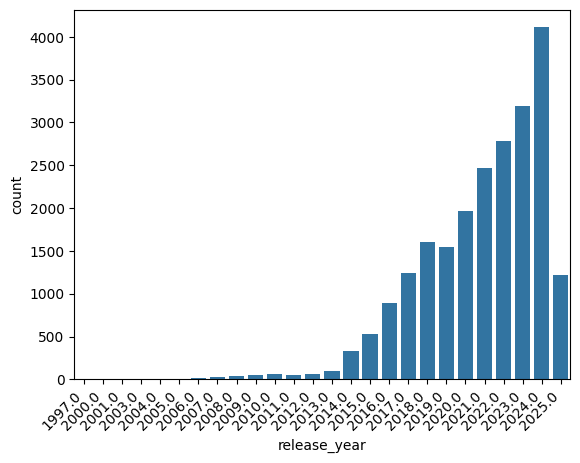

In [50]:
# Print release year, with rotated release_years for visibility.
sns.countplot(data=Sg, x='release_year')
plt.xticks(rotation=45, ha='right')

In [51]:
# Used to locate the genres found in the current sample, this doesn't do anything for the overarching code
# as the genre checker uses all possible genres and creates based on that, not what is found here
# however, the code in terms of prints is nice to acknowledge.
df = Sg

all_genres = []

for genres_str in df['Genres'].dropna():
  genres = [genre.strip() for genre in str(genres_str).split(',')]
  all_genres.extend(genres)

# Given Set can be used to remove duplicates of the same value.
unique_genres = set(all_genres)

print(f"Total unique genres found: {len(unique_genres)}")
print("All unique genres:")
for genre in unique_genres:
    print(f"{genre}")


Total unique genres found: 30
All unique genres:
Gore
Education
Indie
Photo Editing
Racing
Game Development
Nudity
Free To Play
Strategy
Design & Illustration
Software Training
Early Access
Audio Production
RPG
Accounting
Video Production
Action
Utilities
Animation & Modeling
Adventure
Web Publishing
Free to Play
Violent
Short
Simulation
Massively Multiplayer
Sports
Sexual Content
Movie
Casual


In [52]:
df = Sg


# The following implementation was written by Ai and then tweaked based on self requirements (mainly removing encoding features and adding Game genres)
# It required tweaking the implementation of encoding as well, as previously it implemented all Software_Genres and not just all Game_Genres.
Software_Genres = {
    'Accounting', 'Animation & Modeling', 'Audio Production',
    'Design & Illustration', 'Game Development', 'Photo Editing',
    'Software Training', 'Utilities', 'Video Production', 'Web Publishing',
    'Education','Tutorial','Documentary','Short',
}

Game_genres = {
    'Action', 'Adventure', 'Casual', 'Indie', 'Massively Multiplayer',
    'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy',
    'Early Access', 'Free to Play', 'Gore', 'Nudity', 'Sexual Content', 'Violent',
    'Episodic'
}

# Create encoded dataframe
df_encoded = df.copy()

# Clean the Genres column
df_encoded['Genres'] = df_encoded['Genres'].apply(
    lambda x: str(x).replace('Free To Play', 'Free to Play') if pd.notna(x) else x
)

# Create binary columns ONLY for Game_genres
for genre in Game_genres:
    col_name = f'genre_{genre.replace(" ", "_").replace("-", "_").replace("&", "and")}'
    df_encoded[col_name] = df_encoded['Genres'].apply(
        lambda x: 1 if pd.notna(x) and genre in str(x) else 0
    )

# Create grouped features (only the three you want)
df_encoded['is_software'] = df_encoded['Genres'].apply(
    lambda x: 1 if pd.notna(x) and any(s in str(x) for s in Software_Genres) else 0
)

df_encoded['is_game'] = df_encoded['Genres'].apply(
    lambda x: 1 if pd.notna(x) and any(g in str(x) for g in Game_genres) else 0
)

df_encoded['num_genres'] = df_encoded['Genres'].apply(
    lambda x: len([g.strip() for g in str(x).split(',')]) if pd.notna(x) else 0
)

#Printing all columns to see what was fully added.
df_encoded.columns

Index(['Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age',
       'Price', 'Windows', 'Mac', 'Linux', 'Positive', 'Negative',
       'Score rank', 'Achievements', 'Recommendations',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Publishers', 'Categories',
       'Genres', 'Tags', 'release_year', 'release_month', 'genre_Gore',
       'genre_Adventure', 'genre_Indie', 'genre_Action', 'genre_Racing',
       'genre_Nudity', 'genre_Free_to_Play', 'genre_Strategy', 'genre_Violent',
       'genre_Early_Access', 'genre_Simulation', 'genre_Massively_Multiplayer',
       'genre_Sports', 'genre_RPG', 'genre_Sexual_Content', 'genre_Casual',
       'genre_Episodic', 'is_software', 'is_game', 'num_genres'],
      dtype='object')

['20000 - 50000' '0 - 0' '0 - 20000' '100000 - 200000' '500000 - 1000000'
 '1000000 - 2000000' '200000 - 500000' '50000 - 100000'
 '2000000 - 5000000' '5000000 - 10000000' '20000000 - 50000000'
 '50000000 - 100000000' '10000000 - 20000000']
[ 2  0  1  4  6  7  5  3  8  9 11 12 10]
Correlations
                             correlation       abs
release_year                   -0.497998  0.497998
is_game                         0.208651  0.208651
Required age                    0.201740  0.201740
Recommendations                 0.187068  0.187068
Positive                        0.162760  0.162760
Mac                             0.158133  0.158133
Price                           0.158104  0.158104
Negative                        0.153328  0.153328
Linux                           0.115190  0.115190
genre_Action                    0.103379  0.103379
genre_Massively_Multiplayer     0.088280  0.088280
genre_Casual                   -0.083460  0.083460
Median playtime forever         0.080876  

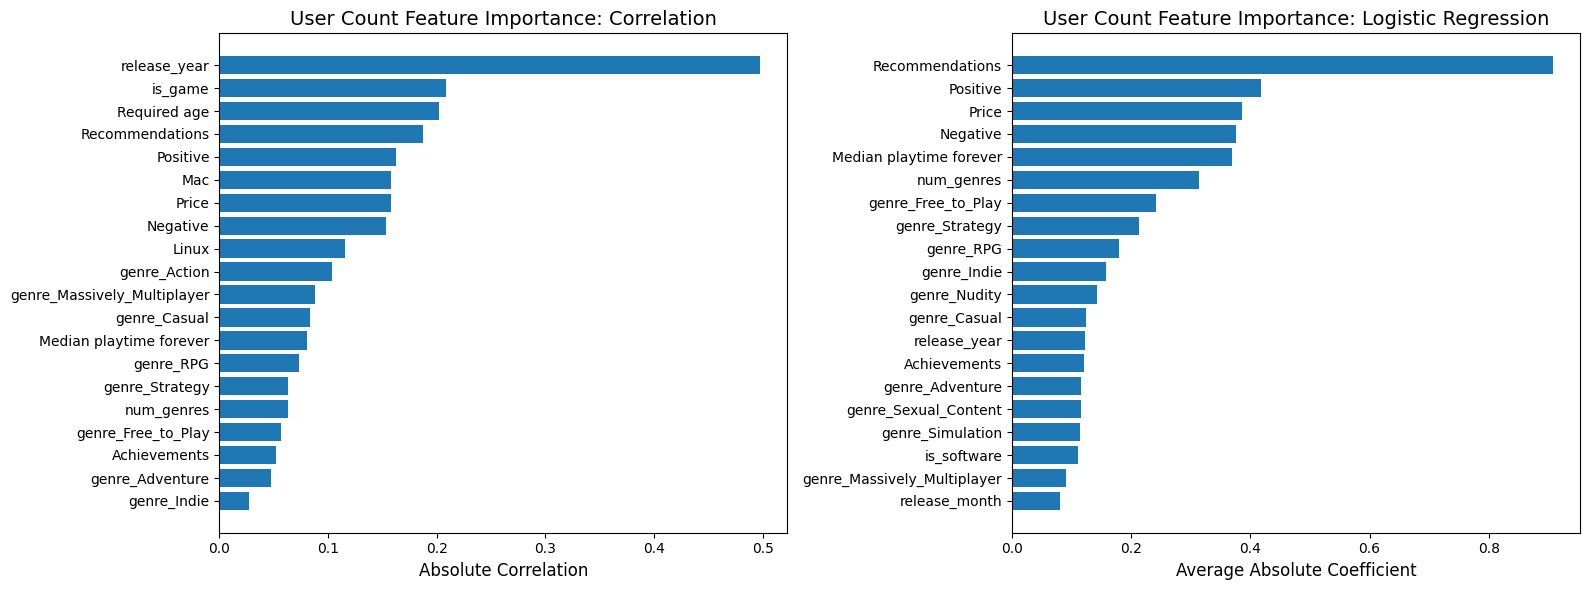

In [64]:
#Logistic Regression Model, Initially was meant to be only logistic regression, but using AI to check work
# Brought the idea of using coef instead. In doing so it had different but sometimes similar values, and I realized
# I could have a graph of both, and overall I am happy with the information able to be garnered from the different graphs.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
unique_owners = df_encoded['Estimated owners'].dropna().unique()

max_val = max([int(v.split(' - ')[1]) for v in unique_owners])
padding = len(str(max_val))

padded_values = [f"{int(v.split(' - ')[0]):0{padding}d} - {int(v.split(' - ')[1]):0{padding}d}"
                 for v in unique_owners]

sorted_indices = np.argsort(padded_values)
new_codes = np.empty_like(sorted_indices)
new_codes[sorted_indices] = np.arange(len(unique_owners))

target_mapping = {unique_owners[i]: new_codes[i] for i in range(len(unique_owners))}
df_encoded['Estimated_Owners'] = df_encoded['Estimated owners'].map(target_mapping)

# Scale the features for better logistic regression coefficients
feature_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
feature_cols += ['is_software', 'is_game', 'num_genres', 'release_year','release_month', 'Price', 'Recommendations','Windows','Mac','Linux','Positive','Negative','Median playtime forever','Required age','Achievements']

print(Sg['Estimated owners'].unique())
print(df_encoded['Estimated_Owners'].unique())

# Remove NaN
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model_scaled = LogisticRegression(max_iter=250, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

# AI suggestions (Once again, these suggestions are sometimes better than something I would imagine to think, especially with my limited knowledge on the subject)
coef_importance_scaled = np.abs(model_scaled.coef_).mean(axis=0)
feature_importance_scaled = pd.DataFrame({
    'feature': feature_cols,
    'importance': coef_importance_scaled
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))



#Plots below were given by AI, they don't use seaborn, The correlation one is something to keep note of, as it is the actual implementation

# Plot 1: Correlation
correlations = df_encoded[feature_cols + ['Estimated_Owners']].corr()['Estimated_Owners'].drop('Estimated_Owners')
correlations_top = correlations.abs().sort_values(ascending=False).head(20)
axes[0].barh(range(len(correlations_top)), correlations_top.values)
axes[0].set_yticks(range(len(correlations_top)))
axes[0].set_yticklabels(correlations_top.index)
axes[0].set_xlabel('Absolute Correlation', fontsize=12)
axes[0].set_title('User Count Feature Importance: Correlation', fontsize=14)
axes[0].invert_yaxis()

#Episodic is na in initial sample
corr_df = correlations.dropna().rename('correlation').to_frame()
corr_df['abs'] = corr_df['correlation'].abs()
corr_df = corr_df.sort_values('abs', ascending=False)
print("Correlations")
print(corr_df)
# Plot 2: Logistic Regression Coefficients, only takes head of the logistic regression that is set into importance scale dataframe.
importance_top = feature_importance_scaled.head(20)
axes[1].barh(range(len(importance_top)), importance_top['importance'].values)
axes[1].set_yticks(range(len(importance_top)))
axes[1].set_yticklabels(importance_top['feature'])
axes[1].set_xlabel('Average Absolute Coefficient', fontsize=12)
axes[1].set_title('User Count Feature Importance: Logistic Regression', fontsize=14)
axes[1].invert_yaxis()

print("Logistic Regression Comparisons")
print(feature_importance_scaled)

plt.tight_layout()
plt.show()

#Given the ifnormation, Recommendations have a weirdly high importance, which can make sense as when having a highly capable game it would likely get
#a good amount of recommendations. (For context, Recommendations is a total suggestions, positive or negative for a game, I believe)

#Weirdly Correlation code doesn't notice a correlation with positive and negative reviews for player count! It seems correlation is genuinely more
# reliable.

#more fun to acknowedlge though is the correlation with specifically Release_Year (Despite it making sense), Mac in correlation, Price
# and the genres for Action, Adventure, RPG, etc.

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlations
                             correlation       abs
Estimated_Owners                0.080876  0.080876
Recommendations                 0.051383  0.051383
Negative                        0.049838  0.049838
is_software                     0.046932  0.046932
release_year                   -0.046015  0.046015
Positive                        0.043597  0.043597
Price                           0.025953  0.025953
genre_Indie                    -0.023734  0.023734
Required age                    0.018339  0.018339
genre_Casual                   -0.015937  0.015937
is_game                        -0.014907  0.014907
Mac                             0.013298  0.013298
genre_Strategy                  0.011632  0.011632
Linux                           0.008753  0.008753
genre_Free_to_Play             -0.007954  0.007954
Achievements                    0.007853  0.007853
genre_RPG                       0.007087  0.007087
genre_Adventure                -0.005575  0.005575
num_genres        

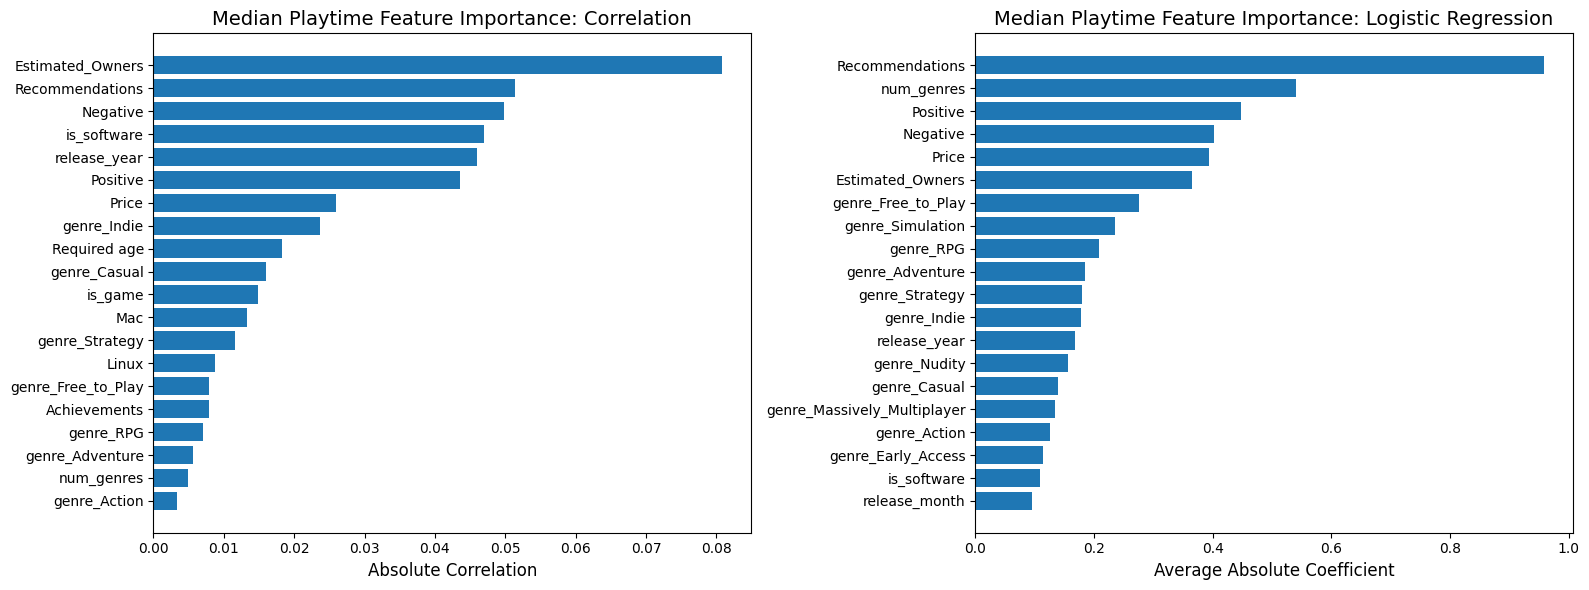

In [55]:
#Now that we can see the correlation and a logistic regression model of the user count, how about checking something else that could be
# an output value like Median playtime forever?

# Scale the features for better logistic regression coefficients
feature_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
feature_cols += ['is_software', 'is_game', 'num_genres', 'release_year','release_month', 'Price', 'Recommendations','Windows','Mac','Linux','Positive','Negative','Estimated_Owners','Required age','Achievements']

#Simplify Playtime to categories so it can be turned into a logistic regression model that doesn't take 400 seconds!
df_encoded['playtime_category'] = pd.cut(
    df_encoded['Median playtime forever'],
    labels=['Very Low (0-30min)', 'Low (30min-2hrs)', 'Medium (2-10hrs)', 'High (10-50hrs)', 'Very High (50hrs+)'],
    bins=[0, 30, 120, 600, 3000, float('inf')]
)
X = df_encoded[feature_cols]
y = df_encoded['playtime_category']

mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_scaled = LogisticRegression(max_iter=150, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

coef_importance_scaled = np.abs(model_scaled.coef_).mean(axis=0)
feature_importance_scaled = pd.DataFrame({
    'feature': feature_cols,
    'importance': coef_importance_scaled
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

correlations = df_encoded[feature_cols].corrwith(df_encoded['Median playtime forever'])
correlations_top = correlations.abs().sort_values(ascending=False).head(20)
axes[0].barh(range(len(correlations_top)), correlations_top.values)
axes[0].set_yticks(range(len(correlations_top)))
axes[0].set_yticklabels(correlations_top.index)
axes[0].set_xlabel('Absolute Correlation', fontsize=12)
axes[0].set_title('Median Playtime Feature Importance: Correlation', fontsize=14)
axes[0].invert_yaxis()

#Wanted to print correlations as values, due to the dataframe correlated it didn't actually have column names, this meant they were inaccesible. It showed up as "Estimated_Owners", and using 'correlation' didn't work whe trying to create the abs column
# Therefore a new dataframe was created using the values attached, assigning the correlation column name, and abs was added.
corr_df = correlations.dropna().rename('correlation').to_frame()
corr_df['abs'] = corr_df['correlation'].abs()
corr_df = corr_df.sort_values('abs', ascending=False)
print("Correlations")
print(corr_df)


importance_top = feature_importance_scaled.head(20)
axes[1].barh(range(len(importance_top)), importance_top['importance'].values)
axes[1].set_yticks(range(len(importance_top)))
axes[1].set_yticklabels(importance_top['feature'])
axes[1].set_xlabel('Average Absolute Coefficient', fontsize=12)
axes[1].set_title('Median Playtime Feature Importance: Logistic Regression', fontsize=14)
axes[1].invert_yaxis()

print("Logistic Regression Comparisons")
print(feature_importance_scaled)

plt.tight_layout()
plt.show()

# Reviews seem more impactful involving a correlation to player engagement, more reccomendations, players, and a higher player count
# Commonly can be seen correlated to more average playtime!

In [56]:
# Curious about Recommendations, and if there was a more clear visual pattern. Overall, it seems to be what I had thought originally
# Despite not appearing on the dataframe below, it included highly estimated owner games.
print(Sg['Recommendations'].unique())
Sg[Sg['Recommendations'] >= 500]

[    0   499   546 ... 12693  1878 12200]


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,release_year,release_month
42027,Particula,2015-02-02,500000 - 1000000,9,0,0.51,True,True,False,1541,...,0,353,0,Microblast Games,SA Industry,"Single-player,Multi-player,Co-op,Online Co-op,...","Casual,Indie,Strategy","Strategy,Indie,Tower Defense,Casual,Co-op,Sing...",2015.0,2.0
87519,Nightingale,2024-02-20,500000 - 1000000,36167,0,26.99,True,False,False,3946,...,0,0,0,Inflexion Games,Inflexion Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,RPG,Early Access","Early Access,Open World Survival Craft,Multipl...",2024.0,2.0
36753,Legend Creatures(传奇生物),2020-06-18,100000 - 200000,104,0,4.99,True,False,False,3217,...,0,670,0,HideChara,HideChara,"Single-player,Steam Achievements,Steam Worksho...","Casual,Indie,Strategy","Indie,Strategy,Casual,Rogue-lite,Auto Battler,...",2020.0,6.0
34230,Manual Samuel - Anniversary Edition,2016-10-14,500000 - 1000000,7,0,1.99,True,True,True,2131,...,0,214,0,Perfectly Paranormal,Curve Games,"Single-player,Multi-player,Co-op,Shared/Split ...","Adventure,Indie","Dark Humor,Singleplayer,Adventure,Local Co-Op,...",2016.0,10.0
13465,OutDrive,2016-02-22,200000 - 500000,6,0,2.99,True,False,False,3376,...,1,211,1,DNVR Prod,DNVR Prod,"Single-player,Steam Achievements,Steam Trading...","Casual,Indie,Racing","Racing,Indie,Casual,Retro,1980s,Music,Great So...",2016.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,Sid Meier's Civilization®: Beyond Earth™,2014-10-23,1000000 - 2000000,579,0,39.99,True,True,True,12323,...,0,860,0,"Firaxis Games,Aspyr (Mac),Aspyr (Linux)","2K,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,Steam Achievements,...",Strategy,"Strategy,Turn-Based Strategy,Sci-fi,Space,4X,T...",2014.0,10.0
12961,IL-2 Sturmovik: 1946,2008-06-13,0 - 20000,0,0,9.99,True,False,False,1355,...,0,0,0,1C: Maddox Games,1C Game Studios,"Single-player,Multi-player,Steam Cloud,Include...",Simulation,"Simulation,Flight,World War II,Military,Histor...",2008.0,6.0
34440,Block Story™,2015-12-10,50000 - 100000,16,0,2.99,True,False,False,878,...,0,384,0,"MindBlocks Studio, LLC","MindBlocks Studio, LLC","Single-player,Steam Achievements,Partial Contr...","Action,Adventure,Indie,RPG","RPG,Adventure,Open World Survival Craft,Sandbo...",2015.0,12.0
55951,Achievement Clicker,2017-11-17,100000 - 200000,3,0,0.99,True,False,False,1806,...,0,19,0,OfficialAndy,MGG Studio,"Single-player,Steam Achievements","Action,Adventure,Casual,Indie,Simulation,Strategy","Casual,Indie,Clicker,Strategy,Simulation,Actio...",2017.0,11.0


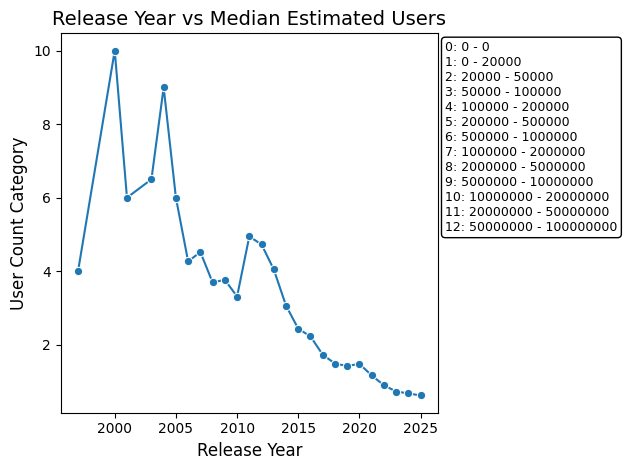

In [57]:

sns.lineplot(data=df_encoded, x='release_year', y='Estimated_Owners', marker='o', errorbar=None)

# Ai given prompt "Given Target_numeric with the code (Insert Target mapping code here), would it be possible to add a key of the variables in a plot?"
legend_text = '\n'.join([f"{v}: {k}" for k, v in sorted(target_mapping.items(), key=lambda x: x[1])])
# To try and make sense of the code, I have no idea what is going on so I'll try to simplify what I percieve.
# Position is set by going past 1 potentially, I'd imagine generation is based on the top left of the object, X,Y.
# legend_text is the applied mapping items, as previously gone over.
# I genuinely have no clue how the transform function works, I believe it is to prevent it from making the graph, or the box to not be part of the plot
# Using AI asking why it's implemented like this and what it does, I believe it allows it to always stay on the top right edge, such that new values wouldn't affect the plot.
# Box style Round makes rounded edges, facecolor is color on the back Initially was "Wheat" or a light yellow.
plt.text(1.02, 0.98, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Release Year vs Median Estimated Users', fontsize=14)
plt.tight_layout()
plt.show()

# Release year steadily decreases estimated users which should be expected.

# I've just realized this data is falwed, the sorting of the output doesn't work well, and seperates in indices of four.

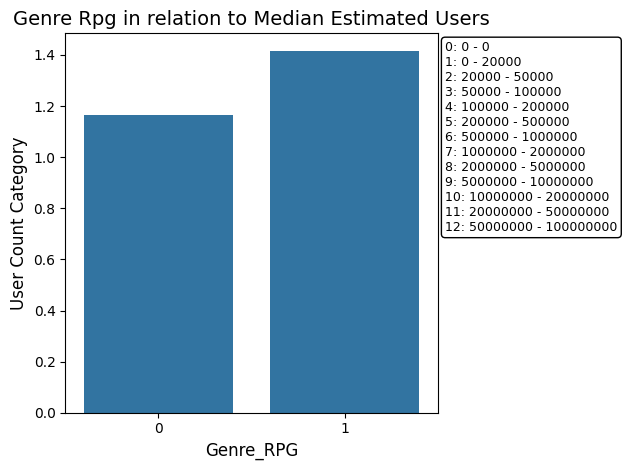

In [58]:
sns.barplot(data=df_encoded, x='genre_RPG', y='Estimated_Owners', errorbar=None)

legend_text = '\n'.join([f"{v}: {k}" for k, v in sorted(target_mapping.items(), key=lambda x: x[1])])
plt.text(1.02, 0.98, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))

plt.xlabel('Genre_RPG', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Genre Rpg in relation to Median Estimated Users', fontsize=14)
plt.tight_layout()
plt.show()

# Small difference between RPG genre and users

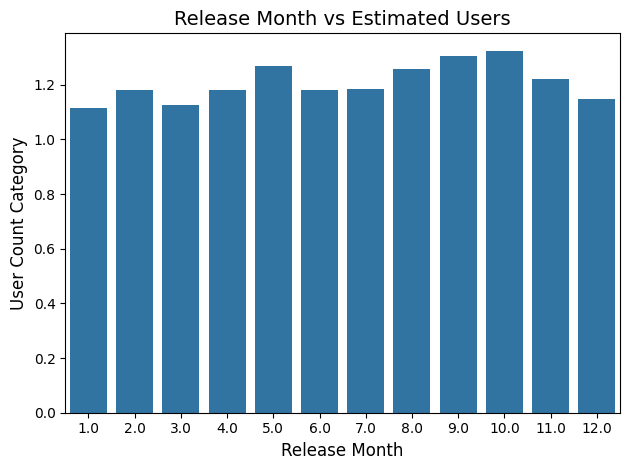

In [59]:
sns.barplot(data=df_encoded, x='release_month', y='Estimated_Owners', errorbar=None)

plt.xlabel('Release Month', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Release Month vs Estimated Users', fontsize=14)
plt.tight_layout()
plt.show()

#No Month difference

/tmp/ipython-input-3984806648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_filter['Estimated_Owners'] = df_encoded['Estimated_Owners']


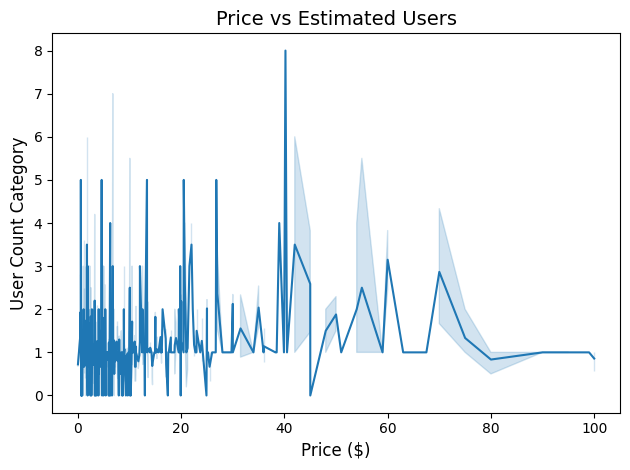

In [60]:
# I would not like to create seperate values for price ranges and get averages, therefore I am just going to use the flat graph.
price_filter = df_encoded[df['Price'] <= 100]
price_filter['Estimated_Owners'] = df_encoded['Estimated_Owners']
sns.lineplot(data=price_filter, x='Price', y='Estimated_Owners')

plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Price vs Estimated Users', fontsize=14)
plt.tight_layout()
plt.show()

#I would like to say we see a correlation, but there actually is not really any, outliers have a big effect, simplifying this graph would be better, however the data shoes negligible data.

<Axes: xlabel='playtime_category', ylabel='Recommendations'>

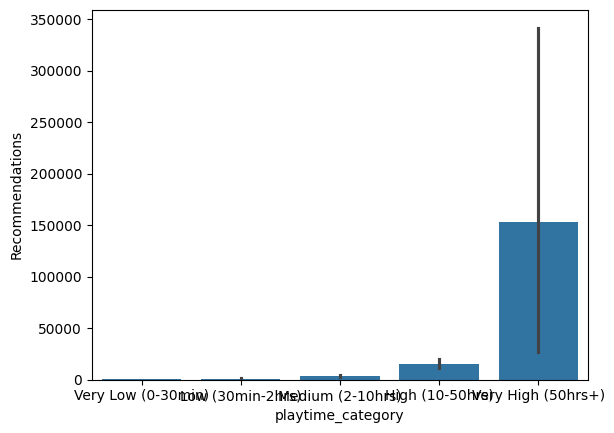

In [61]:
# This should be simplified with ranges for Recommendations, as of now there are hundreds of thousands of values

sns.barplot(data=df_encoded, x='playtime_category', y='Recommendations')

# This shows that it is very likely that recommendations are affected hugely by outliers, and is why logistic regresion finds a high probability.

In [62]:
#Many of the graphs are weaker, especially as I didn't know how I would really go about sorting the data, turning it into an integer and then back may work, or potentially trying to make ranges with equal variable counts such as 010000 - 050000 to relate with
# 050000 - 100000 which would definitely assist with sorting, then probably doing an ascending sort.values().
# I chose not to because I have a problem with time management, and the visualizations can be described by me.
# The project can be shared with future classmates, although the best data for this may be the correlation, and due to the data visualizations requiring explanation they shouldn't really be used.
# OVerall it may pique interest for some classmates, but due to the specialization in values but poor visualizations may make it weaker compared to possible other projects.

['Estimated_Owners']


In [ ]:
#!apt-get update
#!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
#!pip install jupyter nbconvert

#!jupyter nbconvert --to pdf "/content/drive/MyDrive/CSC_108/paper Proposal/FinalProject.ipynb"